In [1]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="notebook", palette="muted")
from sklearn import metrics
from sklearn.externals import joblib
import numpy as np
from os import listdir

/home/phil/miniconda3/envs/mwl/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
MODEL_DIRECTORY = "models/"
TEST_DATA = "test_data.p"

In [3]:
test_data = joblib.load(TEST_DATA)
X_test = test_data.data
y_test = test_data.target

In [4]:
models = listdir(MODEL_DIRECTORY)

In [5]:
results = []
for m in models:
    name = ".".join(m.split(".")[:-1])
    model = joblib.load(MODEL_DIRECTORY + m)
    predictions = model.predict(X_test)
    predictions_proba = model.predict_proba(X_test)
    # metrics
    model_accuracy = model.score(X_test, y_test)
    model_log_loss = metrics.log_loss(y_test, predictions_proba)
    model_precision = metrics.precision_score(y_test, predictions, average='micro')
    model_recall = metrics.recall_score(y_test, predictions, average='micro')
    model_confusion = metrics.confusion_matrix(y_test, predictions)
    model_results = {'name': name, 
                     'predictions': predictions,
                     'predictions_proba': predictions_proba,
                     'accuracy': model_accuracy, 
                     'avg_log_loss': model_log_loss,
                     'precision': model_precision,
                     'recall': model_recall,
                     'confusion_matrix': model_confusion,
                    }
    results.append(model_results)

In [6]:
accuracy_leaderboard = sorted([(r['name'], r['accuracy']) for r in results], 
                            key=lambda x : x[1], reverse=True)
log_loss_leaderboard = sorted([(r['name'], r['avg_log_loss']) for r in results], 
                            key=lambda x: x[1])
precision_leaderboard = sorted([(r['name'], r['precision']) for r in results], 
                             key=lambda x: x[1], reverse=True)
recall_leaderboard = sorted([(r['name'], r['recall']) for r in results], 
                          key=lambda x: x[1], reverse=True)

In [7]:
def plot_leaderboard(leaderboard, title=None, xlabel="Model", ylabel="Score"):
    names = [i[0] for i in leaderboard]
    scores = [i[1] for i in leaderboard]
    ax = plt.subplot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    bar = sns.barplot(names, scores, ax=ax, saturation=0.8)
    y_lim = ax.set_ylim(max(0, min(scores) - np.std(scores)), 
                min(1, max(scores) + np.std(scores)))
    label_offset = (y_lim[1] - y_lim[0]) / 20
    for i, p in enumerate(bar.patches):
        x = p.get_x()
        width = p.get_width()
        height = p.get_height()
        bar.text(x+width/2.7, height-label_offset, 
                 str(round(scores[i], 3)), color='white')
    sns.despine()

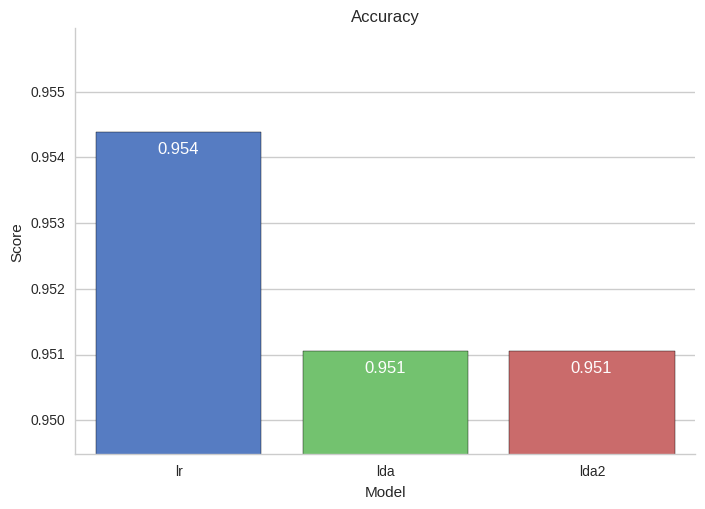

In [8]:
plot_leaderboard(accuracy_leaderboard, "Accuracy")

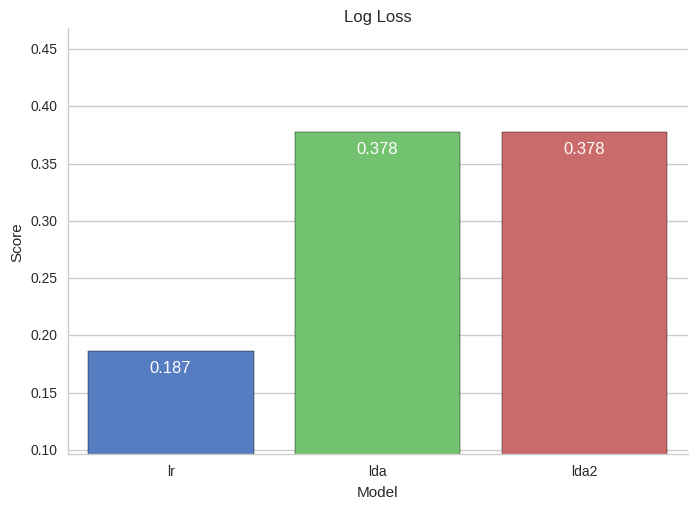

In [9]:
plot_leaderboard(log_loss_leaderboard, "Log Loss")

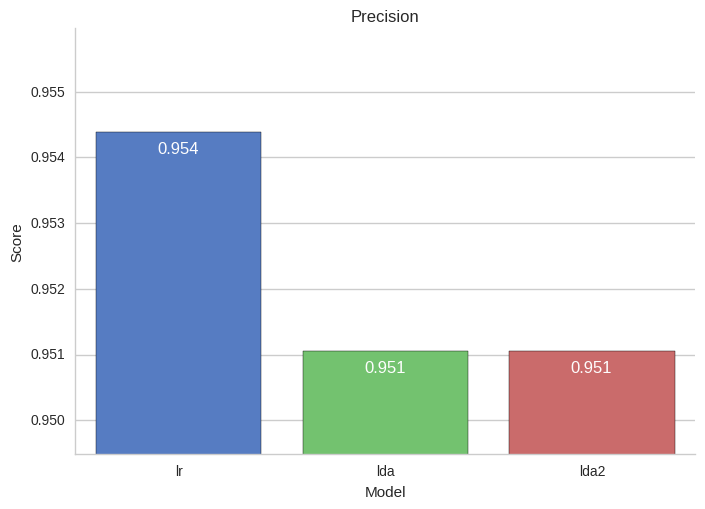

In [10]:
plot_leaderboard(precision_leaderboard, "Precision")

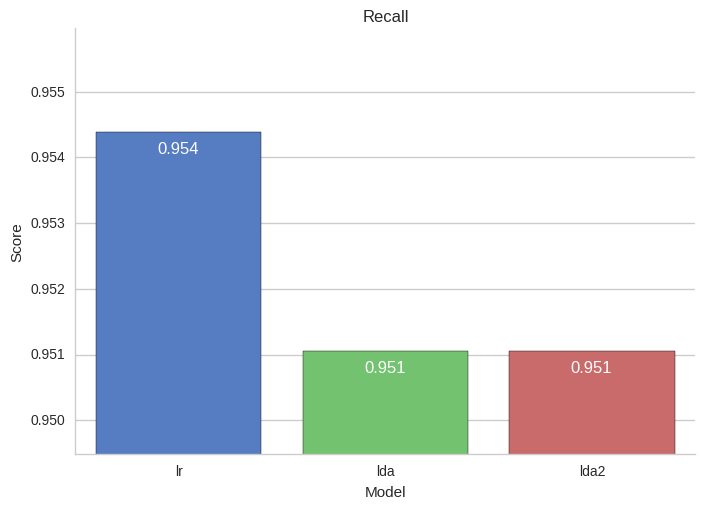

In [11]:
plot_leaderboard(recall_leaderboard, "Recall")